In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data=pd.read_csv("netflix_titles.csv")

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [8]:
data.describe(include="object")

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,14,201,461,6226
top,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,2027,1321,299,3


In [10]:
data.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

# Conclusion
cast,director,date_added,rating and country has some missing values

In [13]:
#cleaning country data
data['country'].value_counts()

United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [15]:
data['country'].isna().sum()

476

In [17]:
data['country']=data['country'].fillna(data['country'].mode()[0])
data['country']=data['country'].astype(str)
data['country']=data['country'].apply(lambda x:x.split(',')[0])

In [18]:
data['country'].value_counts()

United States         2778
India                  808
United Kingdom         483
Canada                 206
Japan                  184
                      ... 
Dominican Republic       1
Somalia                  1
Guatemala                1
Iran                     1
Cyprus                   1
Name: country, Length: 72, dtype: int64

In [20]:
#cleaning ratings 
data['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [21]:
data.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [24]:
data.rating=data.rating.replace({'TV-Y7-FV':'TV-Y7'})
data.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR', 'PG-13',
       'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [25]:
#cleaning director and cast
data.director.fillna('Unknown',inplace=True)
data.cast.fillna('Unknown',inplace=True)

In [26]:
#cleaning date_added,rating by filling mode
mode_data=['date_added','rating']
for i in mode_data:
    data[i]=data[i].fillna(data[i].mode()[0])

In [28]:
data['month']=data['date_added'].apply(lambda x:x.lstrip().split(' ')[0])
data['year']=data['date_added'].apply(lambda x:x.split(',')[-1])

In [33]:
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
month           0
year            0
dtype: int64

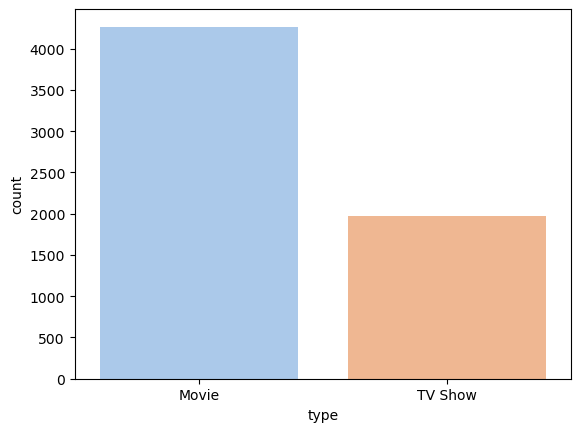

In [36]:
sns.countplot(x ='type', data = data, palette="pastel")
plt.show()

# which is the most common genre?

In [48]:
movies=(data['type']=='Movie')
data_movies=data[movies]
tvshows=(data['type']=='TV Show')
data_tvshows=data[tvshows]
data_movies.head()
data_tvshows.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,year
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7,1 Season,Kids' TV,September,2018
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,September,2018
5,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",September,2017
8,TV Show,Fire Chasers,Unknown,Unknown,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV",September,2017
26,TV Show,Castle of Stars,Unknown,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",United States,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",September,2018


In [73]:
#genres for movies
genres = {}
for genre in data_movies['listed_in']:
    for i in genre.split(','):
        i= i.strip()
        if i not in genres:
            genres[i] =1
        else:
            genres[i] += 1

            
genredf = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
genredf['Genre'].unique()

array(['Children & Family Movies', 'Comedies', 'Stand-Up Comedy',
       'International Movies', 'Sci-Fi & Fantasy', 'Thrillers',
       'Action & Adventure', 'Dramas', 'Cult Movies',
       'Independent Movies', 'Romantic Movies', 'Documentaries',
       'Horror Movies', 'Music & Musicals', 'Anime Features',
       'Faith & Spirituality', 'LGBTQ Movies', 'Movies', 'Classic Movies',
       'Sports Movies'], dtype=object)

In [74]:
genredf.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
3,International Movies,1927
7,Dramas,1623
1,Comedies,1113
11,Documentaries,668
6,Action & Adventure,597


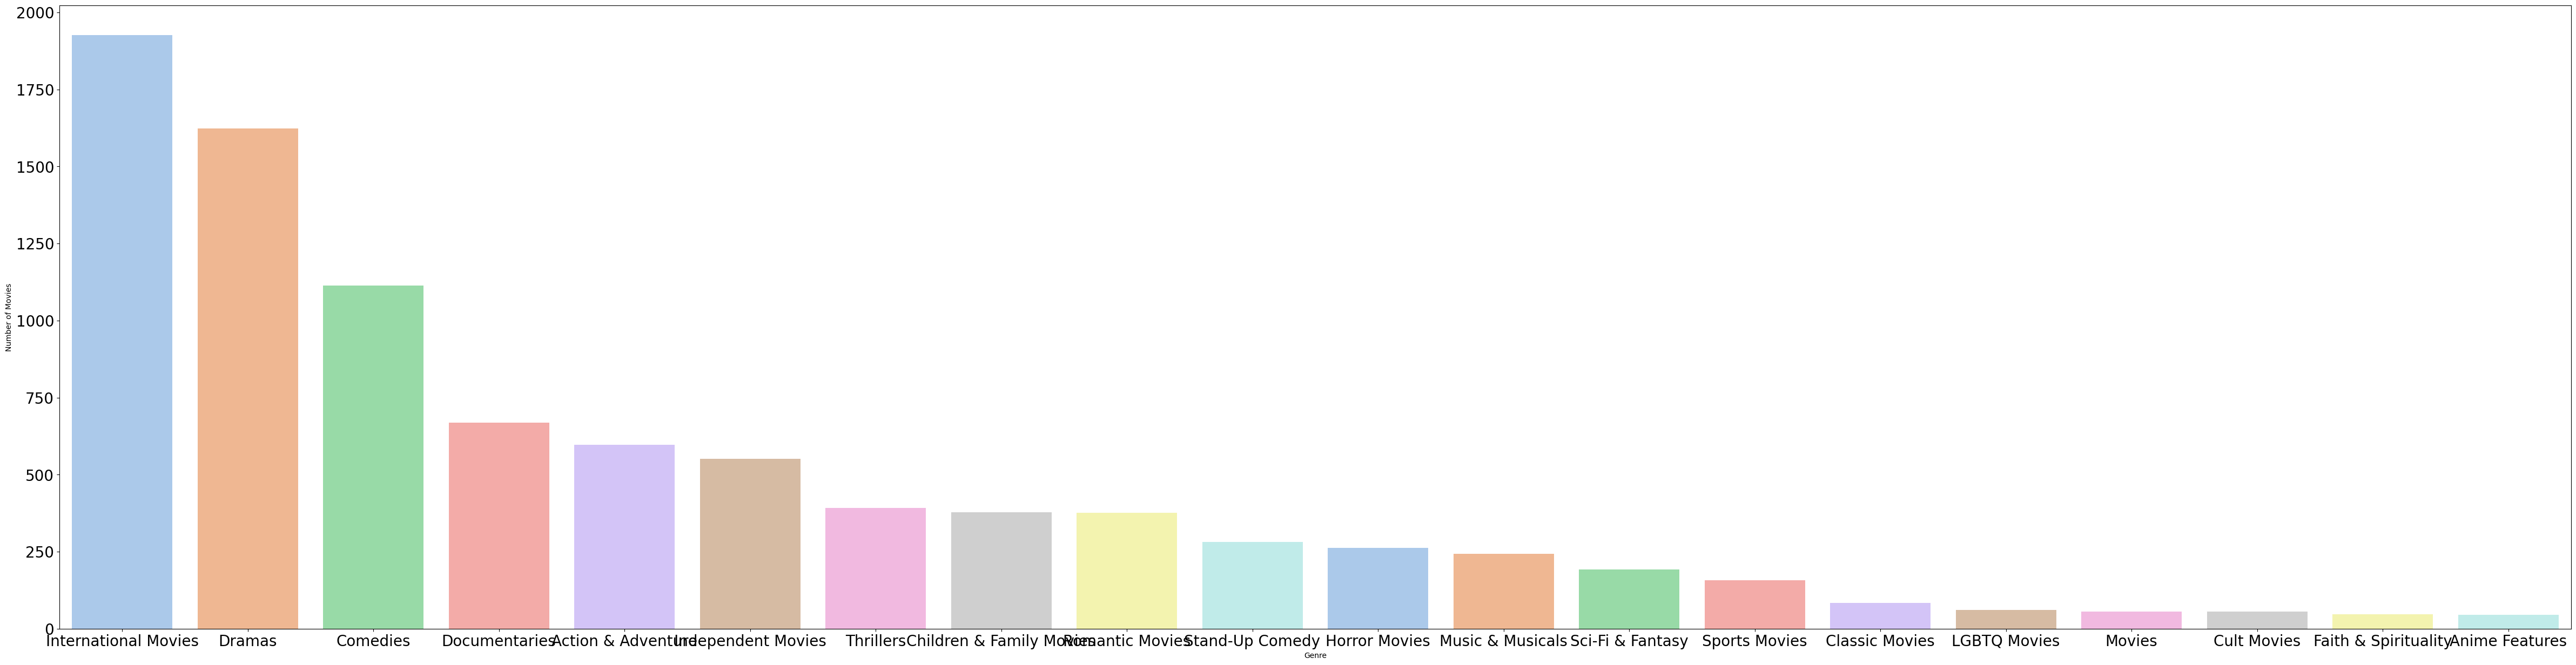

In [77]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre',y='Number of Movies',
            data=genredf.sort_values(by = 'Number of Movies', ascending = False),palette='pastel')
plt.tick_params(labelsize=20,)
plt.show()

In [78]:
#genres for tvshows
genres2 = {}
for genre2 in data_tvshows['listed_in']:
    for i in genre2.split(','):
        i= i.strip()
        if i not in genres2:
            genres2[i] =1
        else:
            genres2[i] += 1

            
genredf2 = pd.DataFrame(list(genres2.items()), columns= ['Genre', 'Number of tvshows'])
genredf2['Genre'].unique()

array(["Kids' TV", 'Crime TV Shows', 'International TV Shows',
       'Spanish-Language TV Shows', 'Docuseries', 'Science & Nature TV',
       'Romantic TV Shows', 'TV Comedies', 'TV Dramas', 'TV Thrillers',
       'TV Mysteries', 'British TV Shows', 'Reality TV',
       'TV Action & Adventure', 'Teen TV Shows', 'Korean TV Shows',
       'Anime Series', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'TV Sci-Fi & Fantasy', 'TV Shows', 'Classic & Cult TV'],
      dtype=object)

In [79]:
genredf2.sort_values(by = 'Number of tvshows', ascending = False).head()

,Genre,Number of tvshows
2,International TV Shows,1001
8,TV Dramas,599
7,TV Comedies,436
1,Crime TV Shows,363
0,Kids' TV,328


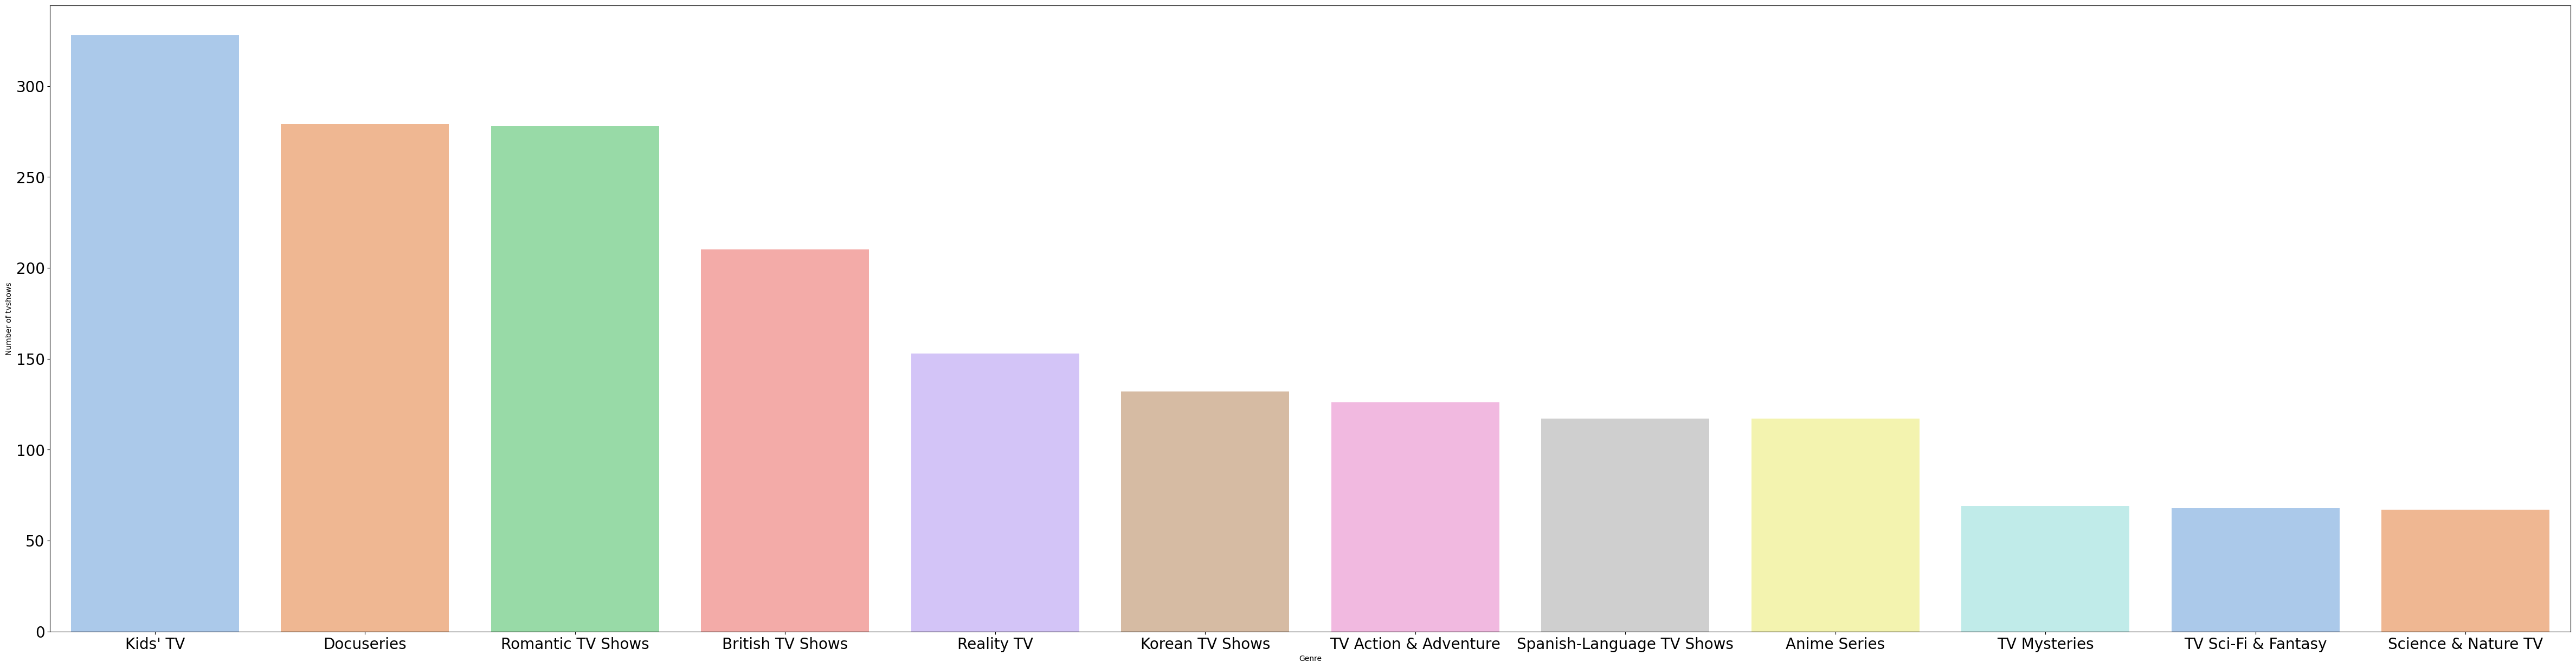

In [81]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre',y='Number of tvshows',
            data=genredf2.sort_values(by = 'Number of tvshows', ascending = False).loc[0:5],palette='pastel')
plt.tick_params(labelsize=20,)
plt.show()

# In which year has been released largest number of movies/ Tvshows?¶

In [82]:
data3 = data.groupby('release_year')['type'].value_counts().unstack(level=-1)


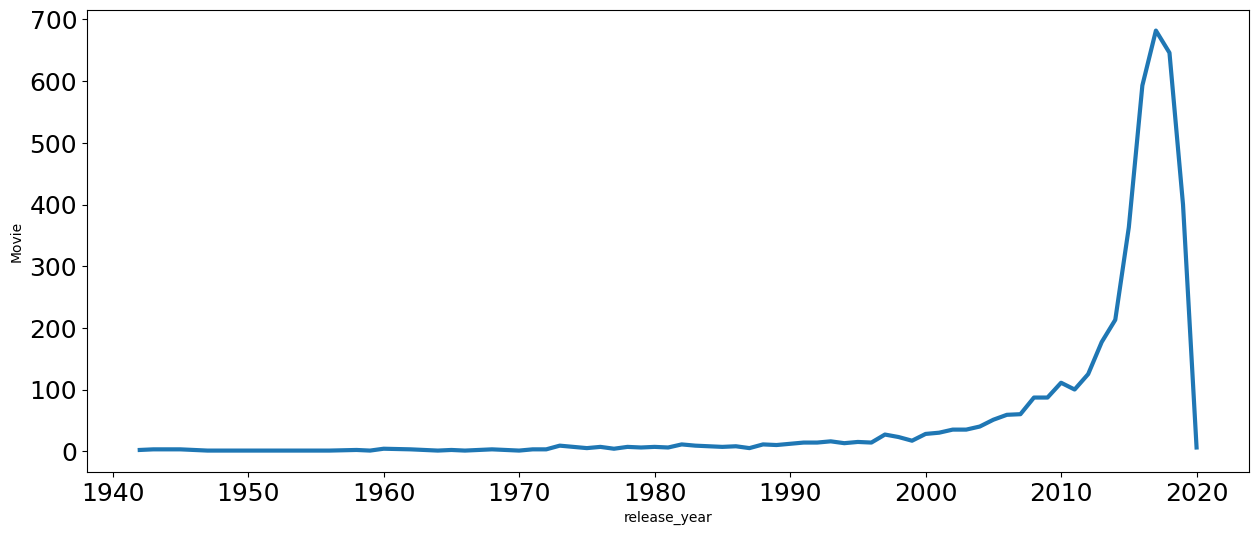

In [83]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='Movie', data=data3,linewidth = 3)
plt.tick_params(labelsize=18)

plt.show()


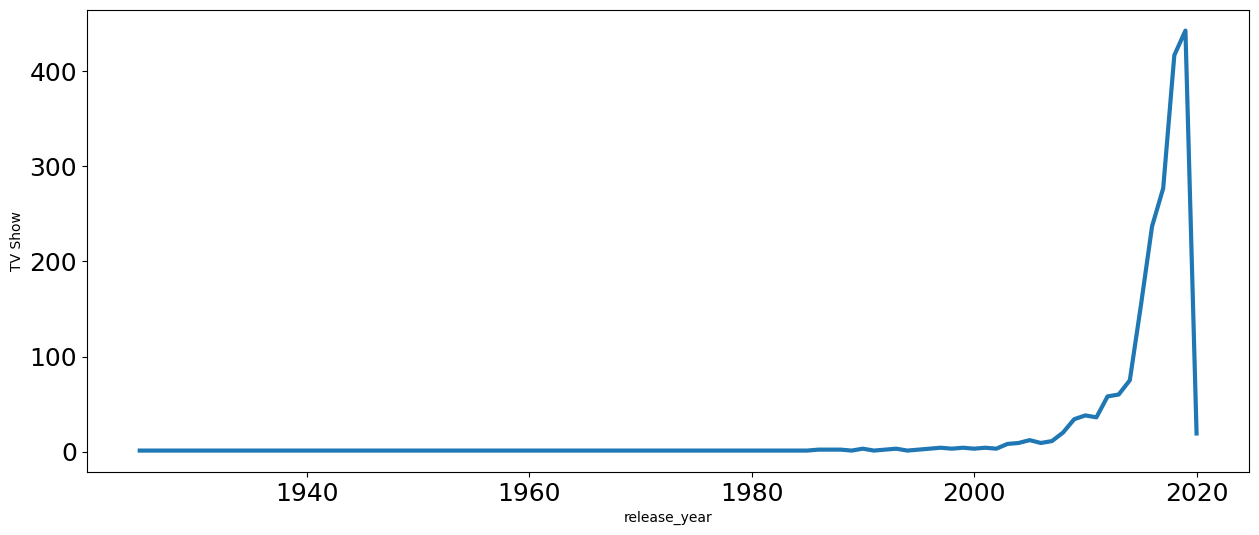

In [84]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='TV Show', data=data3,linewidth = 3)
plt.tick_params(labelsize=18)

plt.show()

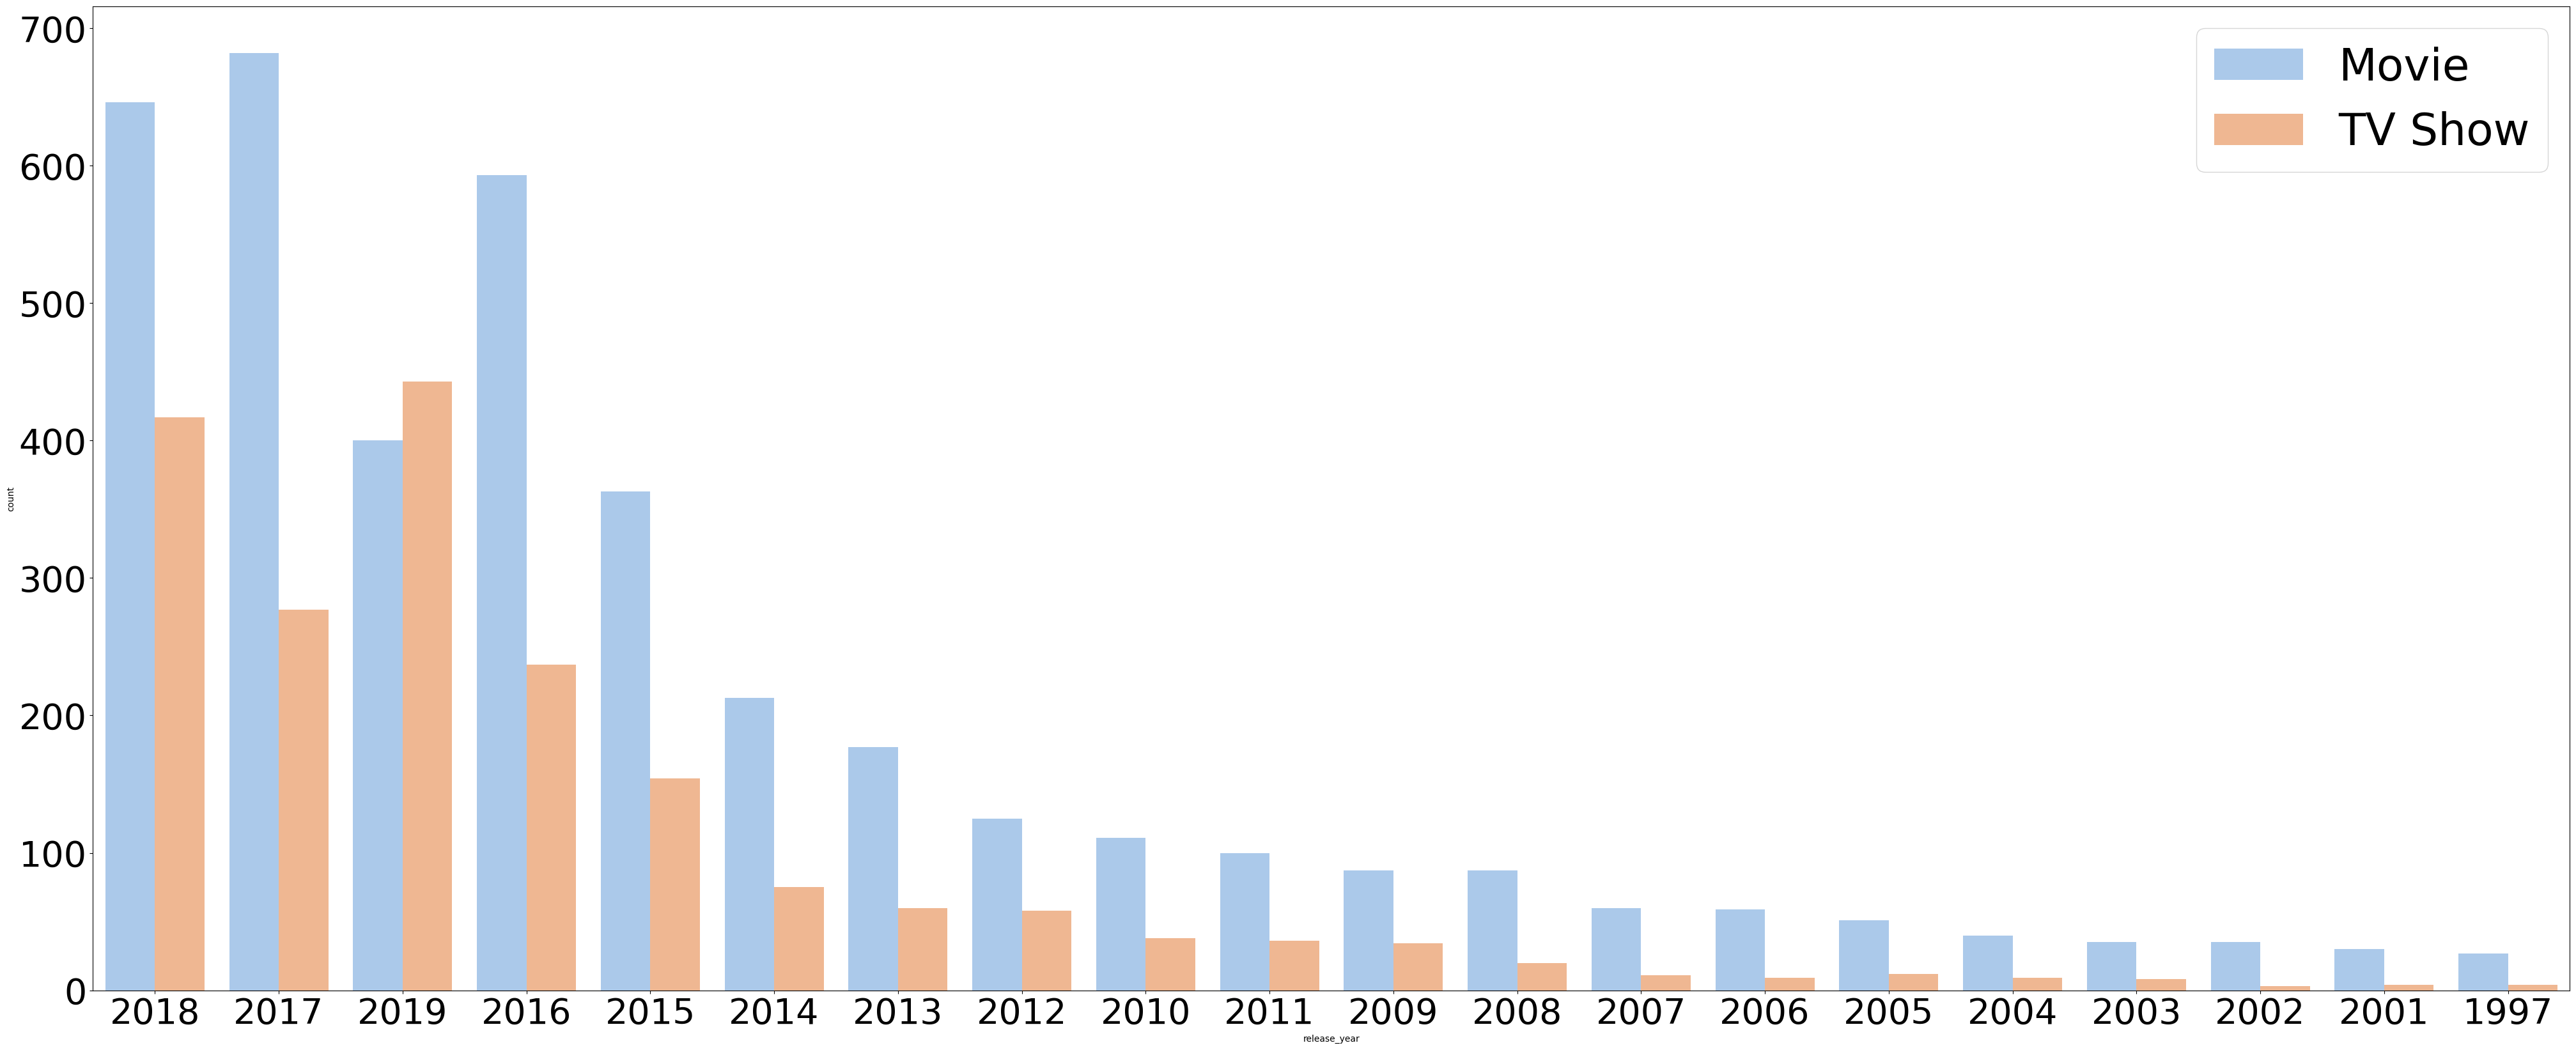

In [86]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(x='release_year',
            data=data,palette='pastel', hue='type', order =data['release_year'].value_counts().index[0:20])

plt.tick_params(labelsize=40)
y.legend(fontsize=50)
plt.show()

# which country has released most ?

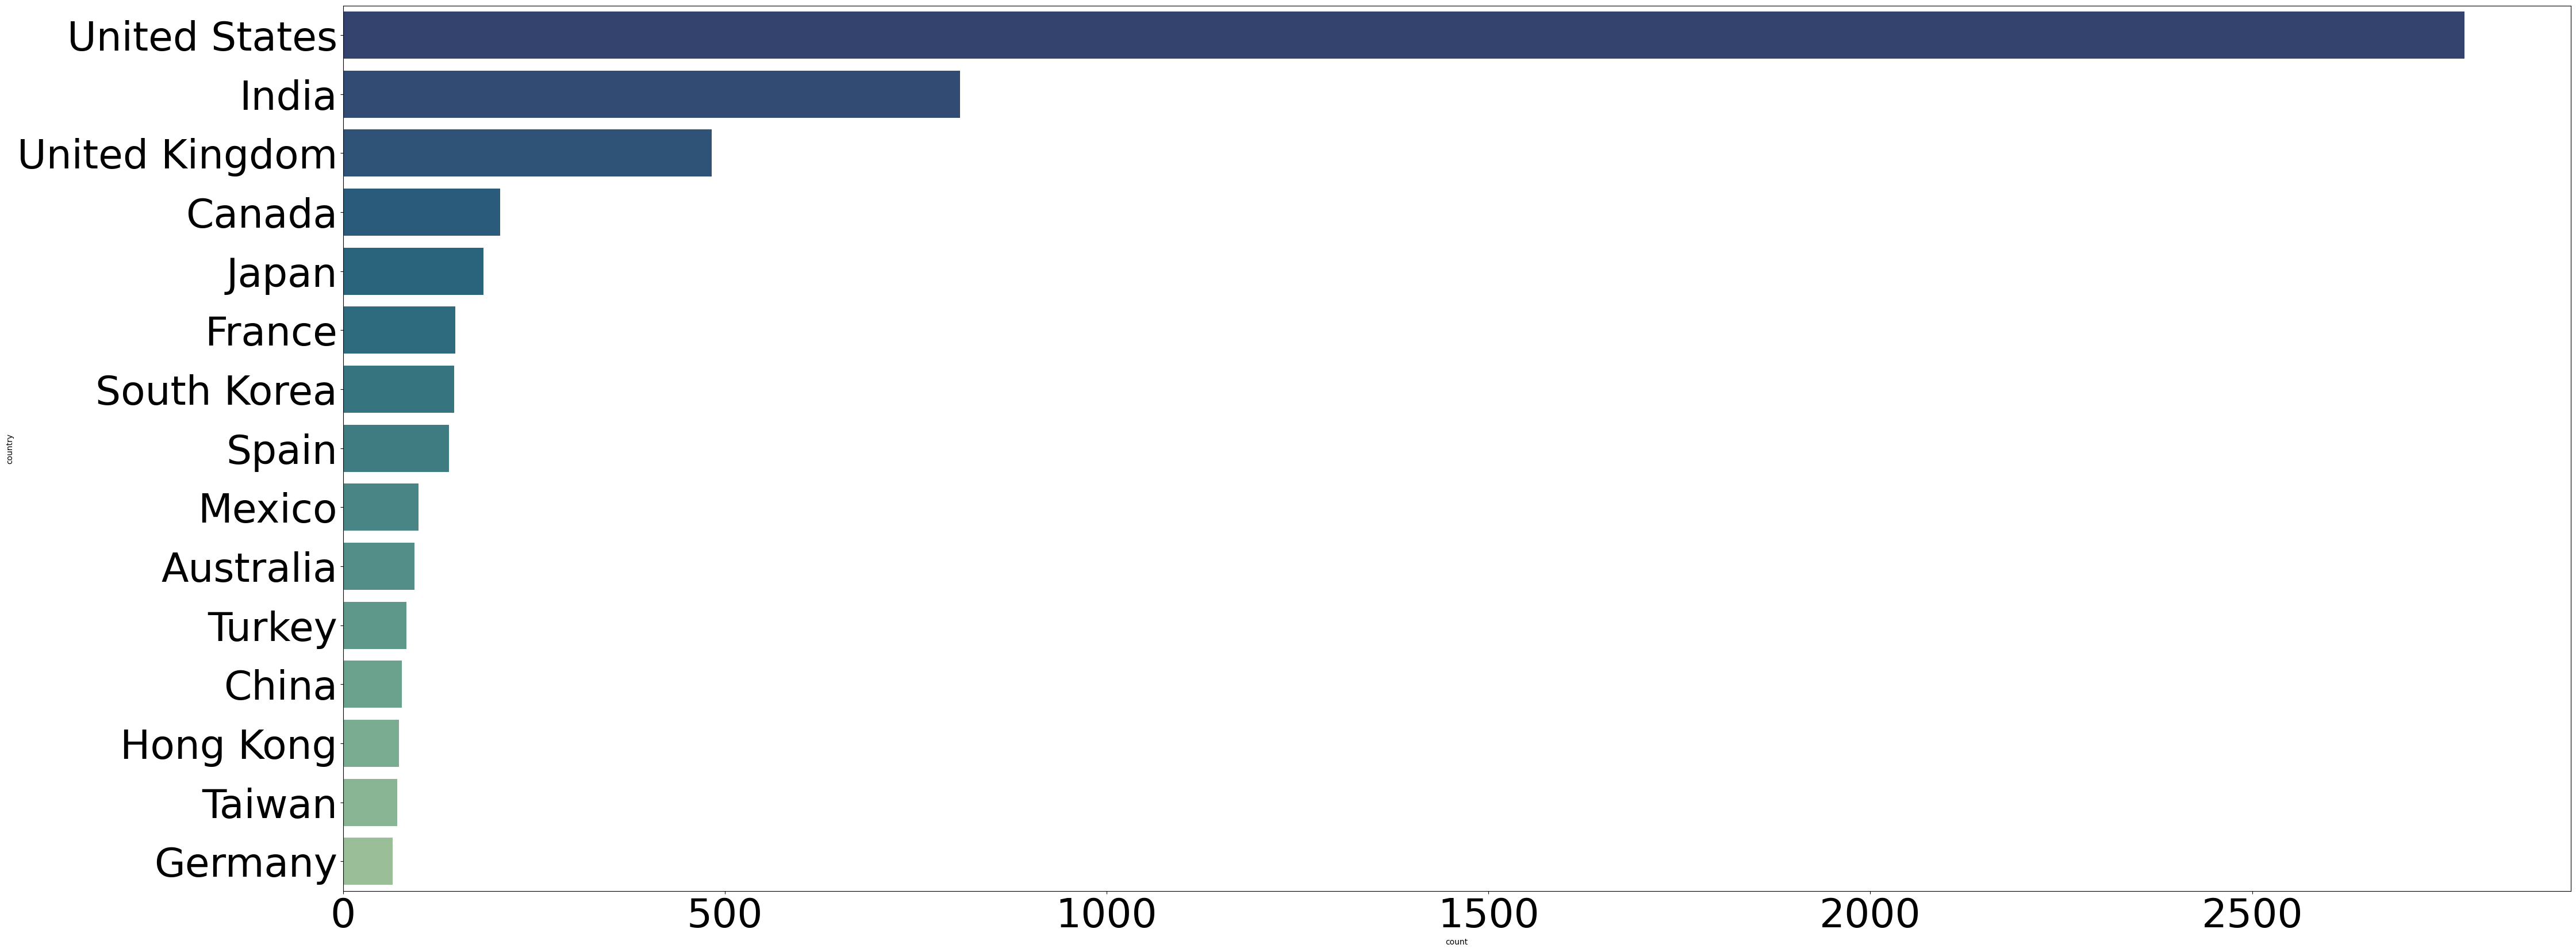

In [87]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(y='country',
            data=data,palette='crest_r', order =data['country'].value_counts().index[:15])

plt.tick_params(labelsize=50)
plt.show()

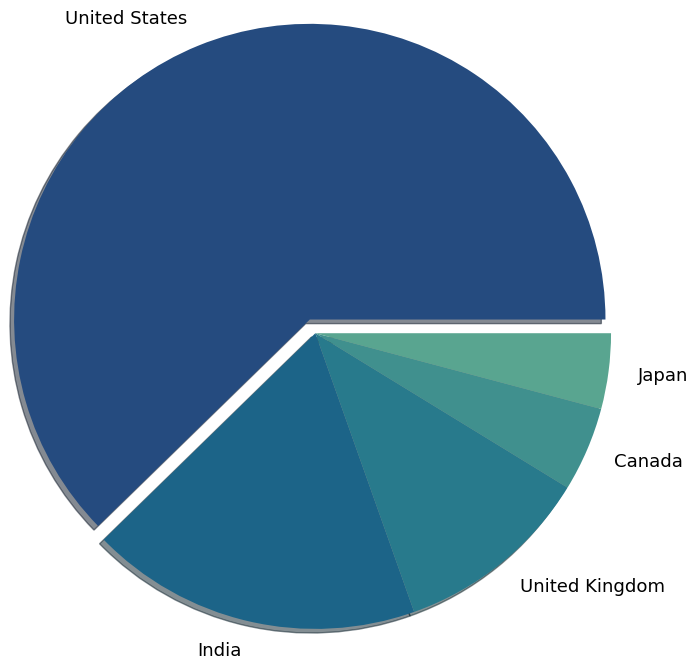

In [88]:
sizes=data['country'].value_counts()
z = np.zeros(748)
z[0] = 0.1

labels = []
for i in data['country'].value_counts()[:5].index:
    labels.append(i)

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0)
ax.pie(sizes[:5],explode=z[:5],labels = labels, radius = 2,shadow = True,
       textprops = {'fontsize':13}, colors=sns.color_palette('crest_r'))

plt.show()

# which content is avaliable for Indians?

In [98]:
india = data[data['country'] == 'India']
ind=pd.DataFrame(dict(india[['title', 'director']].items()))
ind.head(10)

,title,director
35,Article 15,Anubhav Sinha
37,Ee Nagaraniki Emaindi,Tharun Bhascker
41,PK,Rajkumar Hirani
58,Watchman,A. L. Vijay
99,Bard of Blood,Unknown
109,Malaal,Mangesh Hadawale
119,Oh! Baby (Malayalam),B. V. Nandini Reddy
120,Oh! Baby (Tamil),B. V. Nandini Reddy
130,Manmadhudu 2,Rahul Ravindran
136,Do Paise Ki Dhoop Chaar Aane Ki Baarish,Deepti Naval
